## Introduction

Hello and welcome back everyone, in this part of the blog I am going to share how can we create our own people finder tool using BeautifulSoup and Python. 

### Why do we need people finder?
There are lots of benefits of having easier way to find the person. And this might be the best thing for HR companies. Having the list of professionals and their public profile based on their expertise and the experience is one of the rich data. So lets try to make one such data for ourselves.

### How will we do it?
We will automate the search in Search Engine and some search portal like GitHub and then store the result in dataframe then into file. First, we will do google search to find the linkedin profile based on the keyword.


### Installing Dependencies
For this purpose, we are going to use BeautifulSoup, a python library.

In [ ]:
!pip install beautifulsoup4

## Importing Libraries

In [ ]:
import pandas as pd
import requests
import urllib3
from bs4 import BeautifulSoup as BS
import time
import bs4
import warnings
warnings.filterwarnings("ignore")


There are bunch of libraries we will use:
* Pandas to make dataframe later on.
* Requests to make HTTP requests.
* Urllib3 to make manager and headers.
* BeautifulSoup to scrape and search over the page.
* Time to show scrape time.
* Warning to supress the warnings.

## Google Search

Lets use google search to make our first search. Head over to the Google.com and make a first search, `linkedin google engineer`.

![](google.png)

Whenever we search something in Google, it takes our query into `https://google.com/search?q=` and shows the list of results. But mostly the results are location based.

In [45]:

query="linkedin google engineer"
url = f"https://google.com/search?q={query}"

http = urllib3.PoolManager()
http.addheaders = [('User-agent', 'Mozilla/61.0')]
# web_page = http.request('GET',url)
web_page=requests.get(url)
soup = BS(web_page.content, 'html5lib')
# soup

### Getting All URLs

In the search result, there will be a lot of links and we only need links at this moment. So lets find all links using the element `a`.

In [46]:
urls = soup.find_all("a")
# urls

### Getting only URLs that will be relevent

There will be lots of other links which will not be relevant to us at this moment. For example the Google's Sign In page or Privacy Policy so lets do simple check. We will put the name, url of the profile and then role in a dictionary.

In [47]:
profiles = {"names":[],"urls":[],"roles":[]}

for url in urls:
    href = url.get("href")
    
    if "/url?q=" in href and "linkedin" in href and \
        "accounts.google.com" not in href and "policies.google.com" not in href and "linkedin.com/in" in href:
        nhref=href.split("=")[1].split("&")[0]
        
        print(url.text, nhref)
        
        profiles["names"].append(url.text.split("-")[0])
        profiles["roles"].append(url.text.split("-")[1])
        profiles["urls"].append(nhref)
        
        

Akshay Miterani - Software Engineer - Google - LinkedInin.linkedin.com › akshay-mite... https://in.linkedin.com/in/akshay-miterani-108827105
David Garry - Software Engineer - Google | LinkedInwww.linkedin.com › davidgar... https://www.linkedin.com/in/davidgarry1
Betty Chen - Software Engineer - Google | LinkedInwww.linkedin.com › bettyjxch... https://www.linkedin.com/in/bettyjxchen
Risab Manandhar - Software Engineer - Google - LinkedInwww.linkedin.com › risab-ma... https://www.linkedin.com/in/risab-manandhar
Hai Bi - Software Engineer - Google | LinkedInwww.linkedin.com › ... https://www.linkedin.com/in/hai-bi-b6a10010
Sabbir Yousuf Sanny - Software Engineer - Google | LinkedInwww.linkedin.com › ... https://www.linkedin.com/in/sabbir-yousuf-sanny-11aa7a21
Delia Lazarescu - Software Engineer - Google - LinkedInca.linkedin.com › delialazarescu https://ca.linkedin.com/in/delialazarescu
Shailee Patel - Software Engineer - Google | LinkedInwww.linkedin.com › shailee26 https://www.linkedin.

### Dataframe of the results
Dataframes are easy to do data analysis works in Pandas. So lets make one out of above dictionary.

In [50]:
pd.DataFrame(profiles)

,names,urls,roles
0,Akshay Miterani,https://in.linkedin.com/in/akshay-miterani-108...,Software Engineer
1,David Garry,https://www.linkedin.com/in/davidgarry1,Software Engineer
2,Betty Chen,https://www.linkedin.com/in/bettyjxchen,Software Engineer
3,Risab Manandhar,https://www.linkedin.com/in/risab-manandhar,Software Engineer
4,Hai Bi,https://www.linkedin.com/in/hai-bi-b6a10010,Software Engineer
5,Sabbir Yousuf Sanny,https://www.linkedin.com/in/sabbir-yousuf-sann...,Software Engineer
6,Delia Lazarescu,https://ca.linkedin.com/in/delialazarescu,Software Engineer
7,Shailee Patel,https://www.linkedin.com/in/shailee26,Software Engineer
8,Sahil Gaba,https://www.linkedin.com/in/gabag26,Software Engineer


### Pros and Cons of Using Google Search
* Its easier to make GET requests however it might ask us for security check if made too many request and at that time scraping fails.
* It is easier to find people as Google's Crawlers already have list of results based on our query and thus we only have to do very little to find right information. But it might be tough to get information by visiting LinkedIn profile.
* With very little luck, we could visit the person's LinkedIn profile without having to login. So relying in Google Search to find LinkedIn Profile is not much fruitful.


## GitHub Search

In the above part, we scraped some of the LinkedIn profiles from the Google Search but we were unable to get portfolio of people. It is quite common among the tech people to have a portfolio and GitHub account. Lets use GitHub's Search to find people based on the keyword. Most people often put their location, company they work for, twitter handle and the portfolio in the GitHub Profile and we are willing to scrape those.

The URL to get result is `https://github.com/search?q=[QUERY]&type=users&p=[PAGE]`. Where QUERY is the query we will search for, type is user and the p for page.

In [51]:

query="google engineer"
url = f"https://github.com/search?q={query}&type=users"

print(f"URL : {url}")

http = urllib3.PoolManager()
http.addheaders = [('User-agent', 'Mozilla/61.0')]
# web_page = http.request('GET',url)
web_page=requests.get(url)
soup = BS(web_page.content, 'html5lib')

pages = soup.find_all("em", class_="current")[0].get("data-total-pages")

max_page = 5

pages

URL : https://github.com/search?q=google engineer&type=users


'100'

In above result, we did GET request and received a webpage and upon Inspecting the page, we can see the Elements. From Elements we can find the elements like `dev`, `a` and so on where our desired information will be. Like that, we searched for `em` with class as `current` and it have a `data-total-pages` attribute in it. Upon doing get, one can get the value of it. It seems that there are 100 pages with results.

![](github_search.png)

Now we will loop over to those pages to get the information of the user like name and URL of profile.

In [52]:

github_profiles = {"name":[], "urls":[]}

if pages:
    pages=int(pages)
    print(f"Total Pages: {pages}")
    
    for page in range(1,pages):
        if page>max_page:
            break
        url = f"https://github.com/search?q={query}&type=users&p={page}"
        print(f"\n Current URL: {url} \n")
        
        http = urllib3.PoolManager()
        http.addheaders = [('User-agent', 'Mozilla/61.0')]
        
        web_page=requests.get(url)
        soup = BS(web_page.content, 'html5lib')

        for a in soup.find_all("a",class_="mr-1"):

            gurl = "https://github.com/"+a.get("href")
            gname = a.text

            print(gname, gurl)

            github_profiles["name"].append(gname)
            github_profiles["urls"].append(gurl)

Total Pages: 100

 Current URL: https://github.com/search?q=google engineer&type=users&p=1 

Seth Vargo https://github.com//sethvargo
Kevin Naughton Jr. https://github.com//kdn251
Miguel Ángel Durán https://github.com//midudev
Jose Alcérreca https://github.com//JoseAlcerreca
Shubham Mathur https://github.com//googleknight
Dan Field https://github.com//dnfield
Nick Bourdakos https://github.com//bourdakos1
Mark https://github.com//MarkEdmondson1234

 Current URL: https://github.com/search?q=google engineer&type=users&p=2 

Pierfrancesco Soffritti https://github.com//PierfrancescoSoffritti
Parker Moore https://github.com//parkr
Gokmen Goksel https://github.com//gokmen
Justin Poehnelt https://github.com//jpoehnelt
Sanket Singh https://github.com//singhsanket143
Shanqing Cai https://github.com//caisq
Adam Silverstein https://github.com//adamsilverstein
Mizux https://github.com//Mizux
Valerii Iatsko https://github.com//viatsko
Zulkarnine Mahmud https://github.com//zulkarnine

 Current URL: h

In above example, we looped for 5 pages and we have stored those info in dictionary `github_profiles`.

Now we will open the profile of a person and extract information like Twitter Handle and Portfolio.
Lets select a last profile url.

In [53]:
gurl

'https://github.com//ricknout'

Lets visit that url from BS4.

In [54]:

http = urllib3.PoolManager()
http.addheaders = [('User-agent', 'Mozilla/61.0')]
# web_page = http.request('GET',url)
web_page=requests.get(gurl)
soup = BS(web_page.content, 'html5lib')
# soup

Just like previous time, we should look for the class that holds our information. For headline we can do like below.

In [55]:
headline = soup.find_all("div",class_="p-note user-profile-bio mb-3 js-user-profile-bio f4")[0].text
headline

'Android Developer Relations Engineer at Google 🇿🇦'

For Followers and Following Counts we can do something like below.

In [56]:
followers = soup.find_all("a",class_="Link--secondary no-underline no-wrap")[0].text.strip().split("\n")[0]
following = soup.find_all("a",class_="Link--secondary no-underline no-wrap")[1].text.strip().split("\n")[0]
followers,following

('510', '29')

For the information like Twitter handle and Portfolio URL we can do something like below.

In [57]:
vcard = soup.find_all("ul",class_="vcard-details")[0].text
vcard = [v.strip() for v in vcard.strip().split("\n") if len(v.strip())>0]

vcard

['@google', 'Cape Town, South Africa', 'ricknout.dev', 'Twitter', '@ricknout']

But more easily, we can find these information using Itemprop attribute assigned.

In [58]:
vcard = soup.find_all("ul",class_="vcard-details")[0]

portfolio=None
home=None
work=None
twitter=None
for vc in vcard.find_all("li"):
    item=vc.get("itemprop")
    if item=="url":
        portfolio=vc.text.strip()
    if item=="homeLocation":
        home=vc.text.strip()
    if item=="worksFor":
        work=vc.text.strip()
    if item=="twitter":
        twitter=vc.text.strip()

portfolio,home,work,twitter

('ricknout.dev',
 'Cape Town, South Africa',
 '@google',
 'Twitter\n\n      @ricknout')

Now let combine above codes to work as a whole.

In [59]:

query="google engineer"
url = f"https://github.com/search?q={query}&type=users"

print(f"URL : {url}")

http = urllib3.PoolManager()
http.addheaders = [('User-agent', 'Mozilla/61.0')]
# web_page = http.request('GET',url)
web_page=requests.get(url)
soup = BS(web_page.content, 'html5lib')

pages = soup.find_all("em", class_="current")[0].get("data-total-pages")

max_page = 5

github_profiles = {"name":[], "urls":[], "portfolio":[],"headline":[],
                   "followers":[],"following":[],
                   "home":[], "work":[], "twitter":[]}

if pages:
    pages=int(pages)
    print(f"Total Pages: {pages}. Running upto {max_page}.")
    
    for page in range(1,pages):
        if page>max_page:
            break
        url = f"https://github.com/search?q={query}&type=users&p={page}"
        print(f"\n Current URL: {url} \n")
        
        http = urllib3.PoolManager()
        http.addheaders = [('User-agent', 'Mozilla/61.0')]
        
        web_page=requests.get(url)
        osoup = BS(web_page.content, 'html5lib')

        for a in osoup.find_all("a",class_="mr-1"):

            gurl = "https://github.com/"+a.get("href")
            gname = a.text

            print(f"Got: {gname}, {gurl}")

            github_profiles["name"].append(gname)
            github_profiles["urls"].append(gurl)
            
            
            http = urllib3.PoolManager()
            http.addheaders = [('User-agent', 'Mozilla/61.0')]
            web_page=requests.get(gurl)
            soup = BS(web_page.content, 'html5lib')
            
            headline = soup.find_all("div",class_="p-note user-profile-bio mb-3 js-user-profile-bio f4")[0].text
            
            github_profiles["headline"].append(headline)
            
            followers = soup.find_all("a",class_="Link--secondary no-underline no-wrap")[0].text.strip().split("\n")[0]
            following = soup.find_all("a",class_="Link--secondary no-underline no-wrap")[1].text.strip().split("\n")[0]
            
            github_profiles["followers"].append(followers)
            github_profiles["following"].append(following)
            
            vcard = soup.find_all("ul",class_="vcard-details")[0]

            portfolio=None
            home=None
            work=None
            twitter=None
            for vc in vcard.find_all("li"):
                item=vc.get("itemprop")
                if item=="url":
                    portfolio=vc.text.strip()
                if item=="homeLocation":
                    home=vc.text.strip()
                if item=="worksFor":
                    work=vc.text.strip()
                if item=="twitter":
                    twitter=vc.text.strip().split("\n")[-1].strip()
            
            github_profiles["portfolio"].append(portfolio)
            github_profiles["home"].append(home)
            github_profiles["work"].append(work)
            github_profiles["twitter"].append(twitter)
            
            


            
            
            

URL : https://github.com/search?q=google engineer&type=users
Total Pages: 100. Running upto 5.

 Current URL: https://github.com/search?q=google engineer&type=users&p=1 

Got: Seth Vargo, https://github.com//sethvargo
Got: Kevin Naughton Jr., https://github.com//kdn251
Got: Miguel Ángel Durán, https://github.com//midudev
Got: Jose Alcérreca, https://github.com//JoseAlcerreca
Got: Shubham Mathur, https://github.com//googleknight
Got: Nick Bourdakos, https://github.com//bourdakos1
Got: Mark, https://github.com//MarkEdmondson1234
Got: Dan Field, https://github.com//dnfield
Got: Pierfrancesco Soffritti, https://github.com//PierfrancescoSoffritti

 Current URL: https://github.com/search?q=google engineer&type=users&p=2 

Got: Parker Moore, https://github.com//parkr
Got: Gokmen Goksel, https://github.com//gokmen
Got: Sanket Singh, https://github.com//singhsanket143
Got: Justin Poehnelt, https://github.com//jpoehnelt
Got: Shanqing Cai, https://github.com//caisq
Got: Valerii Iatsko, https://gi

### Turn Result into Dataframe
In order to do data analysis, it is easier to work with tabular data. So lets convert our above dictionary into dataframe.

In [63]:
df = pd.DataFrame(github_profiles)
df

,name,urls,portfolio,headline,followers,following,home,work,twitter
0,Seth Vargo,https://github.com//sethvargo,https://www.sethvargo.com,Engineer @google,3.2k,5,"Pittsburgh, PA",@google,@sethvargo
1,Kevin Naughton Jr.,https://github.com//kdn251,youtube.com/kevinnaughtonjr,Software Engineer @google,3.8k,9,"New York, New York",Google,@kevinnaughtonjr
2,Miguel Ángel Durán,https://github.com//midudev,https://midu.dev,Software Engineer\n\nGitHub Star 🌟\nGoogle Dev...,6.3k,10,Barcelona,@AdevintaSpain,@midudev
3,Jose Alcérreca,https://github.com//JoseAlcerreca,twitter.com/ppvi,Android Developer Relations Engineer @ Google,2.3k,0,"Madrid, Spain",@google,@ppvi
4,Shubham Mathur,https://github.com//googleknight,https://googleknight.github.io,Software engineer II @ MDL Bangalore\n,29,40,"Bangalore, India",Mckinsey & Company,None
5,Nick Bourdakos,https://github.com//bourdakos1,None,Software Engineer @google,480,8,New York City,@google,None
6,Mark,https://github.com//MarkEdmondson1234,https://code.markedmondson.me/,Data Engineer @iihnordic \nGoogle Developer E...,783,117,Copenhagen,@iihnordic,@HoloMarkeD
7,Dan Field,https://github.com//dnfield,None,Software Engineer @google for @flutter,928,0,None,@google,None
8,Pierfrancesco Soffritti,https://github.com//PierfrancescoSoffritti,https://pierfrancescosoffritti.com/,Software engineer @google,566,40,"London, UK",@google,@psoffritti
9,Parker Moore,https://github.com//parkr,https://byparker.com,🍩 🌎 Senior Engineer. Currently: @google. Forme...,1.3k,316,USA,Google,None


limit_output extension: Maximum message size of 10000 exceeded with 15427 characters

In [64]:
df.shape

(48, 9)

We were able to scrape about 50 profiles. There are lots of rich information like portfolio of a person and his/her profile headline and twitter handle.

There are few more cleaning needed too. Like The followers and following counts.

In [65]:
df["followers"] = df.followers.apply(lambda x: 1000*float(x.replace("k","")) if "k" in x else float(x))
df.head()

,name,urls,portfolio,headline,followers,following,home,work,twitter
0,Seth Vargo,https://github.com//sethvargo,https://www.sethvargo.com,Engineer @google,3200.0,5,"Pittsburgh, PA",@google,@sethvargo
1,Kevin Naughton Jr.,https://github.com//kdn251,youtube.com/kevinnaughtonjr,Software Engineer @google,3800.0,9,"New York, New York",Google,@kevinnaughtonjr
2,Miguel Ángel Durán,https://github.com//midudev,https://midu.dev,Software Engineer\n\nGitHub Star 🌟\nGoogle Dev...,6300.0,10,Barcelona,@AdevintaSpain,@midudev
3,Jose Alcérreca,https://github.com//JoseAlcerreca,twitter.com/ppvi,Android Developer Relations Engineer @ Google,2300.0,0,"Madrid, Spain",@google,@ppvi
4,Shubham Mathur,https://github.com//googleknight,https://googleknight.github.io,Software engineer II @ MDL Bangalore\n,29.0,40,"Bangalore, India",Mckinsey & Company,None


In [66]:
df["following"] = df.following.apply(lambda x: 1000*float(x.replace("k","")) if "k" in x else float(x))
df.head()

,name,urls,portfolio,headline,followers,following,home,work,twitter
0,Seth Vargo,https://github.com//sethvargo,https://www.sethvargo.com,Engineer @google,3200.0,5.0,"Pittsburgh, PA",@google,@sethvargo
1,Kevin Naughton Jr.,https://github.com//kdn251,youtube.com/kevinnaughtonjr,Software Engineer @google,3800.0,9.0,"New York, New York",Google,@kevinnaughtonjr
2,Miguel Ángel Durán,https://github.com//midudev,https://midu.dev,Software Engineer\n\nGitHub Star 🌟\nGoogle Dev...,6300.0,10.0,Barcelona,@AdevintaSpain,@midudev
3,Jose Alcérreca,https://github.com//JoseAlcerreca,twitter.com/ppvi,Android Developer Relations Engineer @ Google,2300.0,0.0,"Madrid, Spain",@google,@ppvi
4,Shubham Mathur,https://github.com//googleknight,https://googleknight.github.io,Software engineer II @ MDL Bangalore\n,29.0,40.0,"Bangalore, India",Mckinsey & Company,None


### Plotting Followers

We will use `Seaborn` a library built above Matplotlib.

<AxesSubplot:>

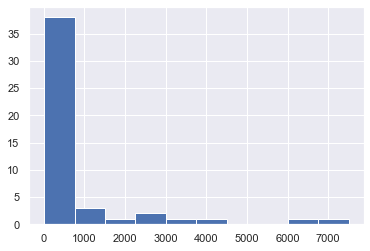

In [67]:
import seaborn as sns
sns.set()


df.followers.hist()

It seems that most people have very less followers.

### Finding Contact Details
If a profile has portfolio, then there is high chances that the portfolio has contact page too. So again, we can scrape that portfolio and collect such information.

### Pros and Cons of Using GitHub Search
* It is quite easier to find people in tech based on the skill-set but finding people who work in tech but does not have GitHub profile is not possible.
* Getting contact details is only possible if a person has the portfolio and that portfolio has it. Either way, its easier than finding the information from LinkedIn Profile.
* Sometimes the results might not be shown once GitHub suspects something is wrong in our request.